In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
! wget --header="Host: doc-10-bg-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Cookie: AUTH_97l4q168vtjubiqekap122744uju38hp=00692712740946432976|1620963150000|6bjs9k3pluu8jvfskeigr0fnl0f64pek" --header="Connection: keep-alive" "https://doc-10-bg-docs.googleusercontent.com/docs/securesc/4ls0pdcu0es9vtagblif44k75uiol3bg/l8bs1nprncaqk8bclaaccuvbc56jtncs/1620963225000/13061182627446198291/00692712740946432976/10rmPrIB8lwn5c3xRFaihJx5lLeu_OXne?e=download&authuser=0" -c -O 'zomato.csv'


--2021-05-14 03:35:12--  https://doc-10-bg-docs.googleusercontent.com/docs/securesc/4ls0pdcu0es9vtagblif44k75uiol3bg/l8bs1nprncaqk8bclaaccuvbc56jtncs/1620963225000/13061182627446198291/00692712740946432976/10rmPrIB8lwn5c3xRFaihJx5lLeu_OXne?e=download&authuser=0
Resolving doc-10-bg-docs.googleusercontent.com (doc-10-bg-docs.googleusercontent.com)... 216.58.192.65, 2607:f8b0:4026:802::2001
Connecting to doc-10-bg-docs.googleusercontent.com (doc-10-bg-docs.googleusercontent.com)|216.58.192.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘zomato.csv’

zomato.csv              [          <=>       ] 547.48M  73.3MB/s    in 12s     

2021-05-14 03:35:24 (47.4 MB/s) - ‘zomato.csv’ saved [574072999]



#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [7]:

df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.shape

(51717, 17)

In [9]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
len(df['name'].unique())

8792

In [11]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

getting all NAN features

In [12]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [13]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [16]:
df.shape

(43942, 17)

In [17]:
def split(x):
    return x.split('/')[0]

In [18]:
df['rate']=df['rate'].apply(split)

In [19]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [20]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [21]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Getting nan features

In [22]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['phone', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)']

In [23]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

phone has 1.8934 % missing values
rest_type has 0.3436 % missing values
dish_liked has 46.2724 % missing values
cuisines has 0.025 % missing values
approx_cost(for two people) has 0.5735 % missing values


In [24]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [25]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [26]:
df.shape

(43942, 17)

In [27]:
def split(x):
    return x.split('/')[0]

In [28]:
df['rate']=df['rate'].apply(split)

In [29]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [30]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [31]:
df.replace('NEW',0,inplace=True)

In [32]:
df.replace('-',0,inplace=True)

In [33]:
df['rate']=df['rate'].astype(float)

### calculate avg rating of each resturant

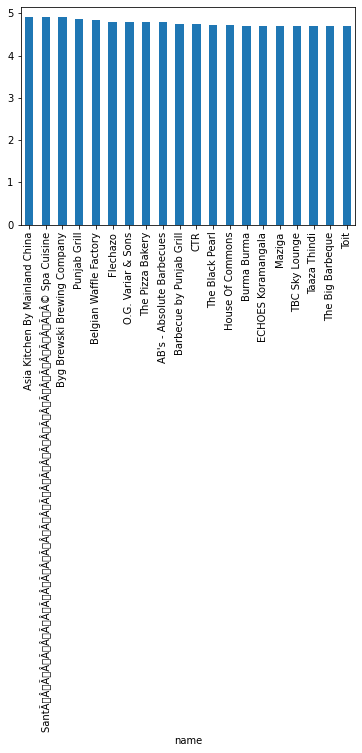

In [34]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [35]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(20)

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


In [36]:
df_rate.shape

(7162, 2)

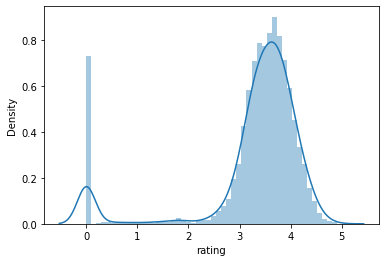

In [37]:
sns.distplot(df_rate['rating'])

##### Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.


#### Which are the top restaurant chains in Bangaluru?

Text(0.5, 0, 'Number of outlets')

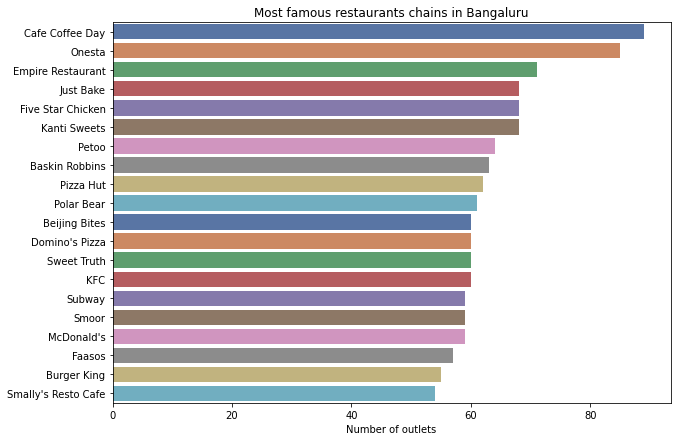

In [38]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

##### How many of the restuarants do not accept online orders?

([<matplotlib.patches.Wedge at 0x7f74caf45690>,
 [Text(-0.481488774517003, 0.9890240442042423, ''),
  Text(0.5252605823084886, -1.0789352717716423, '')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

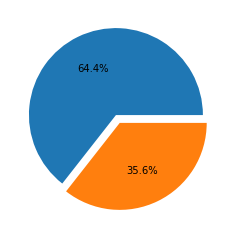

In [39]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

##### using plotly, How many of the restuarants do not accept online orders?

In [40]:
import plotly.express as px

In [41]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [42]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

#### What is the ratio b/w restaurants that provide and do not provide table booking ?

([<matplotlib.patches.Wedge at 0x7f74c8232bd0>,
 [Text(-0.9856961240827233, 0.4882654513359477, ''),
  Text(1.0753048626356982, -0.5326532196392153, '')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

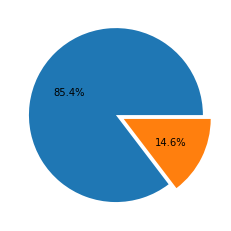

In [43]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

##### using plotly, #### What is the ratio b/w restaurants that provide and do not provide table booking ?

In [44]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [45]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [46]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [47]:
iplot([trace])

#### How many types of restaurants we have?

In [48]:
df['rest_type'].isna().sum()

151

In [49]:
df['rest_type'].dropna(inplace=True)

In [50]:
len(df['rest_type'].unique())

88

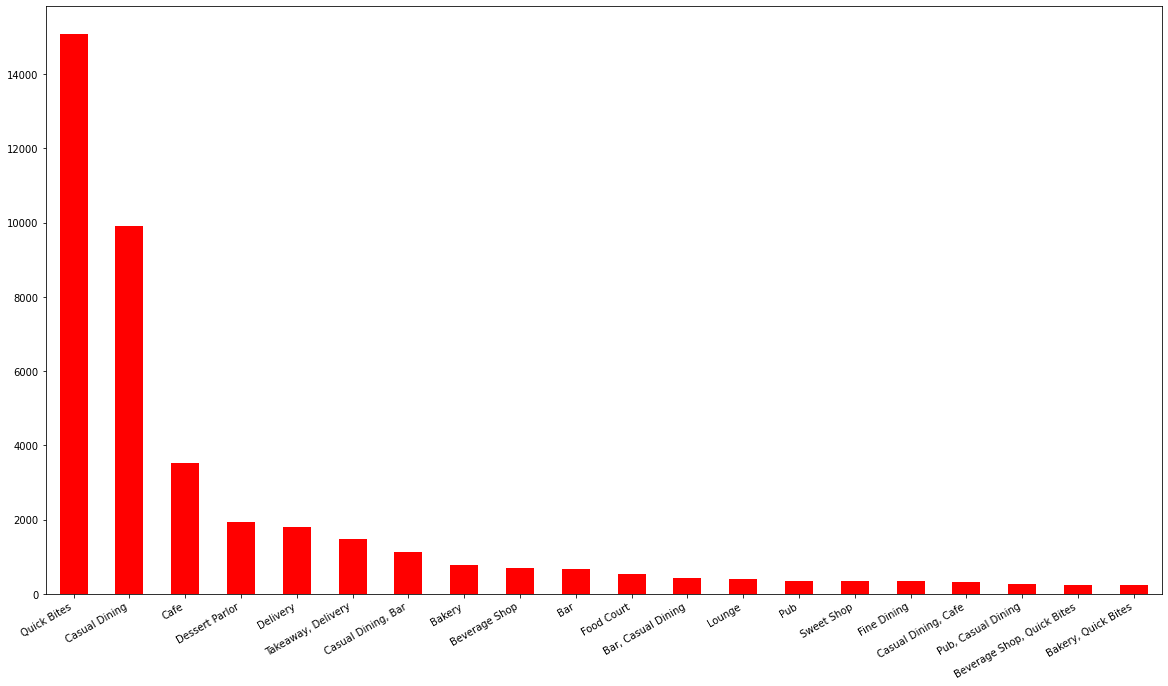

In [51]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

In [52]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [53]:
iplot([trace1])

##### At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
##### We can observe tha Quick Bites type restaurants dominates.


#### highest voted restaurant

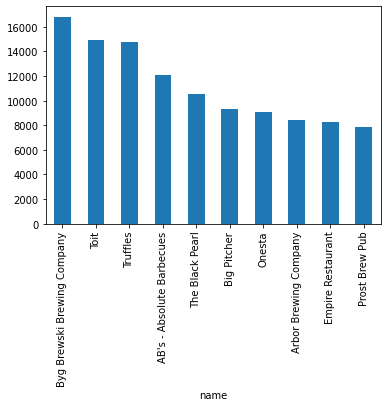

In [54]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()
    

##### now using plotly to  provide interactive graphs

In [55]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')

In [56]:
iplot([trace1])

### total restaurants at different locations of Bengalore

In [57]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [58]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))


In [59]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


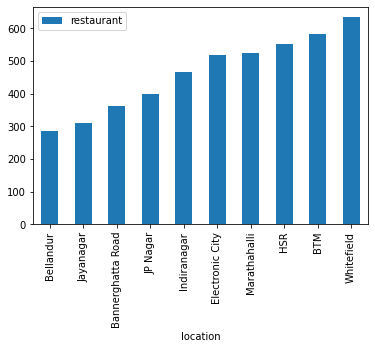

In [60]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()


In [61]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [62]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [63]:
iplot([trace1])

In [64]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### different type of restaurants

In [65]:
#data is represented in form of percentage 
(df['rest_type'].value_counts()/len(df))*100

Quick Bites                   34.302035
Casual Dining                 22.582040
Cafe                           8.026489
Dessert Parlor                 4.412635
Delivery                       4.075827
                                ...    
Dessert Parlor, Kiosk          0.004551
Dessert Parlor, Food Court     0.004551
Bakery, Beverage Shop          0.004551
Bakery, Food Court             0.004551
Quick Bites, Kiosk             0.002276
Name: rest_type, Length: 87, dtype: float64

### Total number of variety of restaurants ie north indian,south Indian

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

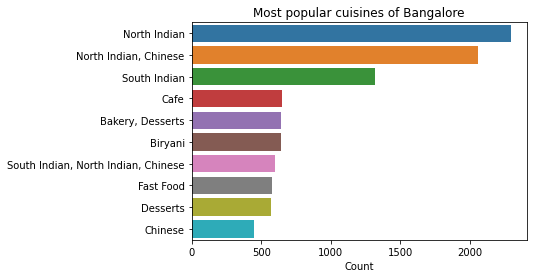

In [66]:

cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [67]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')

In [68]:
iplot([trace1])

### We can observe that North Indian,chinese,South Indian and Biriyani are most common.
### It means Bengalore is more influenced by North Indian culture more than South

### Analyse Approx cost for 2 people

In [69]:
len(df['approx_cost(for two people)'].value_counts())

66

In [70]:
df['approx_cost(for two people)'].isna().sum()

252

In [71]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [72]:
df['approx_cost(for two people)'].isna().sum()

0

In [73]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [74]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [75]:
df[~df['approx_cost(for two people)'].apply(is_float)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
67,https://www.zomato.com/gustoesbeerhouse?contex...,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...","1,200","[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari
119,https://www.zomato.com/bangalore/k27-the-pub-b...,"27, 27th Cross, 2nd Stage, Banashankari, Banga...",K27 - The Pub,No,No,3.1,30,+91 9980097472,Banashankari,Bar,NaN,"Chinese, North Indian","1,000","[('Rated 4.0', ""RATED\n Convenient and Averag...",[],Delivery,Banashankari
166,https://www.zomato.com/bangalore/patio-805-jay...,"805, Ground Floor, 35C Cross, 9th Main, 4th Bl...",Patio 805,Yes,Yes,4.1,364,+91 8884999805,Jayanagar,Casual Dining,"Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...","Thai, Vietnamese, Asian, Chinese","1,200","[('Rated 4.0', ""RATED\n The number of good re...",[],Delivery,Banashankari
207,https://www.zomato.com/bangalore/chutney-chang...,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...",Chutney Chang,Yes,Yes,4.1,2339,080 22443007\r\n+91 9901967373,Jayanagar,Casual Dining,"Veg Momos, Brownie Chocolate, Palak Chaat, Mut...","North Indian, Chinese, BBQ","1,500","[('Rated 4.0', 'RATED\n Great place for team ...",[],Delivery,Banashankari
217,https://www.zomato.com/bangalore/toscano-jayan...,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,4.3,1129,080 41558423\r\n+91 7619320074,Jayanagar,Casual Dining,"Pizza, Pasta, Salads, Calamari, Ravioli, Pumpk...","Italian, Salad","1,300","[('Rated 4.0', 'RATED\n Saturday Night Dinner...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [76]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [77]:
df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [78]:
type(df['approx_cost(for two people)'][0])

str

### remove,

In [79]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [80]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

##### cost vs rating

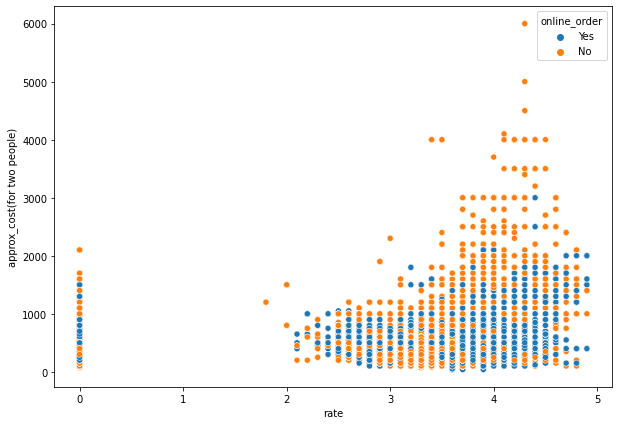

In [81]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

##### from this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too

In [82]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Is there any difference b/w votes of restaurants accepting and not accepting online orders?

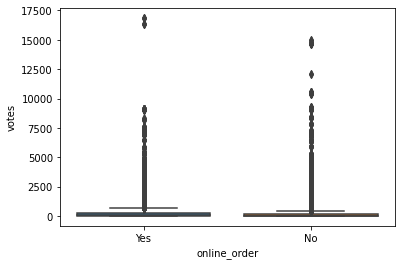

In [83]:
sns.boxplot(x='online_order',y='votes',data=df)

#### from this boxplot,we can observe that median number of votes for both categories vary.
#### Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

#### Is there any difference b/w price of restaurants accepting and not accepting online orders?

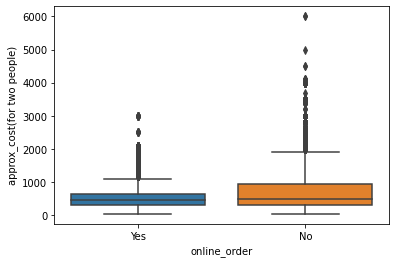

In [84]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

In [85]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

#### Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders

### Cheapest Rate for 2 people

In [86]:
df['approx_cost(for two people)'].min()

40

### Most costly for 2 people

In [87]:
df['approx_cost(for two people)'].max()

6000

In [88]:
df[df['approx_cost(for two people)']==6000]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,080 30571234\r\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
45618,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,080 30571234\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road


In [89]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

<img src='https://b.zmtcdn.com/data/pictures/5/59215/c2760a70e3968778c0dbcba6e17f3ae4_featured_v2.jpg?fit=around|750:500&crop=750:500;*,*'>

##### distribution of cost for 2 people

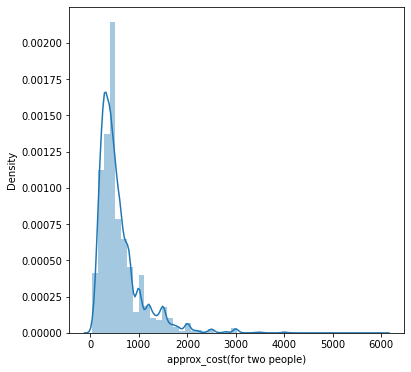

In [90]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [91]:
px.histogram(df, x="approx_cost(for two people)")

##### most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious

### Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [92]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [93]:
df[df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]


,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [94]:
data=df.copy()

In [95]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [96]:
data.set_index('name',inplace=True)

### Top 10 Most Expensive restaurant with approx cost for 2 people

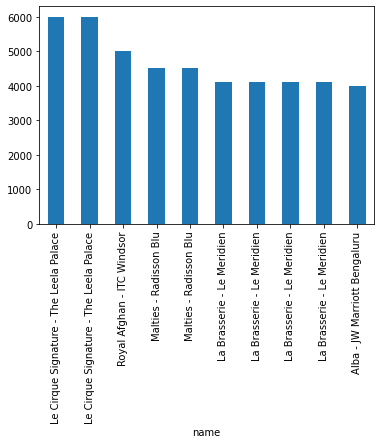

In [97]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

In [98]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nlargest(10).index,
        y = data['approx_cost(for two people)'].nlargest(10),
        name= 'Priority')
iplot([trace1])

### Top 10 Cheapest restaurant with approx cost for 2 people

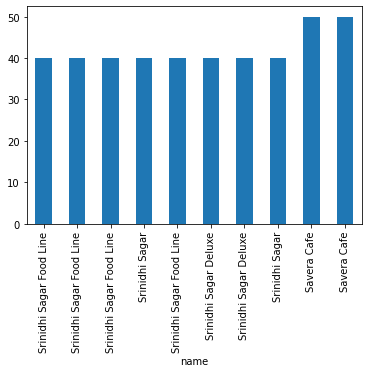

In [99]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [100]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nsmallest(10).index,
        y = data['approx_cost(for two people)'].nsmallest(10),
        name= 'Priority')
iplot([trace1])

### Top 10 Cheapest restaurant location wise with approx cost for 2 people 

In [101]:
data.set_index('location',inplace=True)
data['approx_cost(for two people)'].nsmallest(10)

location
Indiranagar         40
Indiranagar         40
Indiranagar         40
Old Airport Road    40
Indiranagar         40
Domlur              40
Domlur              40
Old Airport Road    40
Shivajinagar        50
Shivajinagar        50
Name: approx_cost(for two people), dtype: int64

### all the restautant that are below than 500(budget hotel)

In [102]:
data[data['approx_cost(for two people)']<=500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [103]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


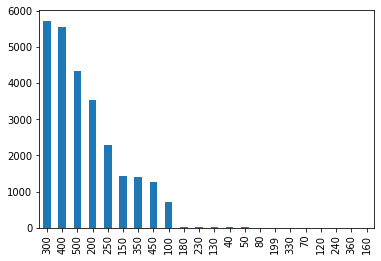

In [104]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

### we can conclude that 300 and 400 cost dishes are maximum in count

In [105]:
trace1 = go.Bar( 
        x = df_budget['approx_cost(for two people)'].value_counts().index,
        y = df_budget['approx_cost(for two people)'].value_counts(),
        name= 'Priority')
iplot([trace1])

### Restaurants that have better rating >4 and that are under budget too

In [106]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape


(4007, 17)

### Total no. of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [107]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

### Total such various  affordable hotels at different location

In [108]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    
    

In [109]:
len(location)

68

In [110]:
len(total)

68

In [111]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)


In [112]:
location_df.head(20)

,restaurant
location,
BTM,54
Banashankari,25
Banaswadi,3
Bannerghatta Road,19
Basavanagudi,31
Basaveshwara Nagar,3
Bellandur,20
Brigade Road,11
Brookefield,16


In [113]:
type(location)

list

Text(0, 0.5, 'Total restaurants')

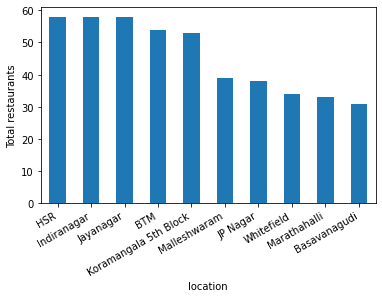

In [114]:

location_df['restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

In [115]:
trace1 = go.Bar( 
        x = location_df['restaurant'].nlargest(10).index,
        y = location_df['restaurant'].nlargest(10),
        name= 'Priority')
iplot([trace1])

# To Visualise what are the names of those hotels

In [116]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())
    

In [117]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

,res_names
location,
BTM,"[eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff..."
Banashankari,[CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi,"[Pooja Dosa Camp, Corner House Ice Cream, The ..."
Bannerghatta Road,"[BOX8- Desi Meals, Krishna Kuteera, Krishna Ku..."
Basavanagudi,"[Kabab Magic, Sri Guru Kottureshwara Davangere..."


### Finding Best budget Restaurants in any location

In [118]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [119]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

### Which are the foodie areas?

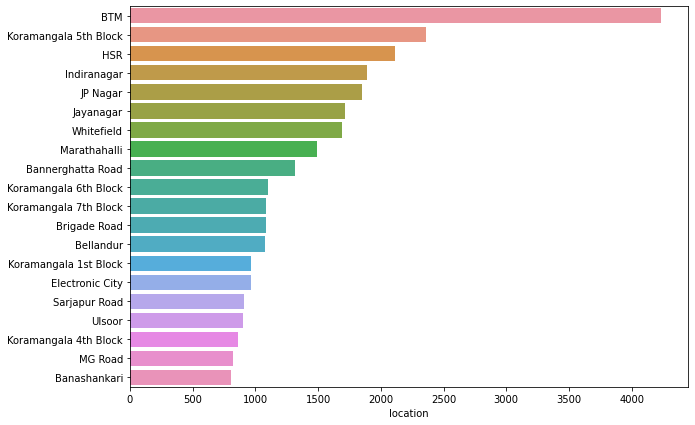

In [120]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

In [121]:

Restaurant_locations=df['location'].value_counts()[:20]
trace1 = go.Bar( 
        x = Restaurant_locations.index,
        y = Restaurant_locations,
        name= 'Priority')
iplot([trace1])

#### We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
#### BTM dominates the section by having more than 5000 restaurants.

### geographical analysis

#### I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [122]:
df.shape

(43690, 17)

In [123]:
len(df['location'].unique())

92

In [124]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [125]:
locations['new_Name']='Bangalore '+locations['Name']

In [126]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [127]:
from geopy.geocoders import Nominatim

In [128]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [129]:
locations['geo_loc']=lat_lon

In [130]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [131]:
locations.to_csv('zomato_locations.csv',index=False)

##### We have found out latitude and longitude of each location listed in the dataset using geopy.
##### This is used to plot maps.

In [132]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [133]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

,Name,count
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


##### now combine both the dataframes

In [134]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [135]:
locations.shape

(92, 3)

In [136]:
Rest_locations.shape

(92, 2)

In [137]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

,Name,count,new_Name,geo_loc
0,BTM,4237,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(13.00540865, 74.79460685941484)"
2,HSR,2113,Bangalore HSR,"(18.1475, 41.538889)"
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)"


In [138]:
Restaurant_locations['count'].max()

4237

In [139]:
type(Restaurant_locations['geo_loc'][0])

tuple

In [140]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [141]:
len(Restaurant_locations['geo_loc'])

91

In [142]:
Restaurant_locations.isna().sum()

Name        0
count       0
new_Name    0
geo_loc     0
dtype: int64

In [143]:
Restaurant_locations['geo_loc'][0][0]

45.95485055

In [144]:
Restaurant_locations['geo_loc'][0][1]

-112.49659530324134

In [145]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134),
       (13.00540865, 74.79460685941484), (18.1475, 41.538889),
       (12.9732913, 77.6404672), (12.2655944, 76.6465404),
       (27.64392675, 83.05280519687284), (44.3730577, -71.6118577),
       (12.9552572, 77.6984163), (12.9114375, 77.5999754),
       (12.9400321, 77.6203272), (13.0078418, 74.7963208),
       (44.621621, -84.790422), (12.93577245, 77.66676103753434),
       (14.5395813, 121.070371), (32.2934563, -64.78236307254568),
       (12.9252241, 77.6367015), (12.9778793, 77.6246697),
       (12.93433385, 77.63040639553275), (15.5003906, 73.8298947),
       (15.8876779, 75.7046777), (13.0221416, 77.6403368),
       (13.0027353, 77.5703253), (12.9417261, 77.5755021),
       (50.7721586, 0.09772783661369303), (-28.5477541, 29.788093),
       (33.5935063, -79.0345627), (12.996845, 77.6130165),
       (51.373656, -0.1042366), (13.0093455, 77.6377094),
       (13.0170347, 77.5726006), (40.7652844, -76.373824),
       (13.0141618, 77.65185

In [146]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [147]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [148]:
Restaurant_locations.head()

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,4237,Bangalore BTM,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(13.00540865, 74.79460685941484)",13.005409,74.794607
2,HSR,2113,Bangalore HSR,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)",12.265594,76.646540


In [149]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [150]:
basemap

In [151]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4237.0],
 [13.00540865, 74.79460685941484, 2358.0],
 [18.1475, 41.538889, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1711.0],
 [44.3730577, -71.6118577, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.9114375, 77.5999754, 1318.0],
 [12.9400321, 77.6203272, 1103.0],
 [13.0078418, 74.7963208, 1084.0],
 [44.621621, -84.790422, 1084.0],
 [12.93577245, 77.66676103753434, 1078.0],
 [14.5395813, 121.070371, 964.0],
 [32.2934563, -64.78236307254568, 963.0],
 [12.9252241, 77.6367015, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.93433385, 77.63040639553275, 864.0],
 [15.5003906, 73.8298947, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [12.9417261, 77.5755021, 628.0],
 [50.7721586, 0.09772783661369303, 626.0],
 [-28.5477541, 29.788093, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.996845, 77.6130165, 574.0],
 [51.373656, -

In [153]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)

In [154]:
basemap

##### It is clear that restaurants tend to concentrate in central bangalore area.
##### The clutter of restaurants lowers are we move away from central.
##### So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

#### note heatmap is good when we have latitude,longitude or imporatnce of that particular place or count of that place

### Heatmap of North Indian restaurants

In [155]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [156]:
df2= df[df['cuisines']=='North Indian']
df2.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [157]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

,Name,count
0,BTM,262
1,Banashankari,35
2,Banaswadi,9
3,Bannerghatta Road,60
4,Basavanagudi,17


In [158]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [159]:
north_india.head()

,Name,count,new_Name,geo_loc
0,BTM,262,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Banashankari,35,Bangalore Banashankari,"(15.8876779, 75.7046777)"
2,Banaswadi,9,Bangalore Banaswadi,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,60,Bangalore Bannerghatta Road,"(12.9114375, 77.5999754)"
4,Basavanagudi,17,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"


In [161]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)


In [162]:
north_india.drop(['geo_loc'],axis=1)

,Name,count,new_Name,lan,lon
0,BTM,262,Bangalore BTM,45.954851,-112.496595
1,Banashankari,35,Bangalore Banashankari,15.887678,75.704678
2,Banaswadi,9,Bangalore Banaswadi,13.014162,77.651854
3,Bannerghatta Road,60,Bangalore Bannerghatta Road,12.911437,77.599975
4,Basavanagudi,17,Bangalore Basavanagudi,12.941726,77.575502
...,...,...,...,...,...
58,"Varthur Main Road, Whitefield",3,"Bangalore Varthur Main Road, Whitefield",12.941466,77.747094
59,Vasanth Nagar,12,Bangalore Vasanth Nagar,12.988721,77.585169
60,Whitefield,146,Bangalore Whitefield,44.373058,-71.611858
61,Wilson Garden,37,Bangalore Wilson Garden,12.948934,77.596827


In [163]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

###### What about South Indian cuisines?

In [164]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)


In [165]:
south_india=south_india.drop(['geo_loc'],axis=1)

In [166]:
south_india.head()


,Name,count,new_Name,lan,lon
0,BTM,262,Bangalore BTM,45.954851,-112.496595
1,Banashankari,35,Bangalore Banashankari,15.887678,75.704678
2,Banaswadi,9,Bangalore Banaswadi,13.014162,77.651854
3,Bannerghatta Road,60,Bangalore Bannerghatta Road,12.911437,77.599975
4,Basavanagudi,17,Bangalore Basavanagudi,12.941726,77.575502


In [168]:
basemap=generateBaseMap()
HeatMap(south_india[['lan','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

##### Which are the most popular casual dining restaurant chains?

In [169]:
df_1=df.groupby(['rest_type','name']).agg('count')
datas=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [170]:
datas

,level_0,rest_type,name,count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,1,"Bakery, Beverage Shop",Homey Bake & Juice,1
4,1,"Bakery, Beverage Shop",Bake The Cake,1
...,...,...,...,...
203,85,Takeaway,TheRiceBowl.In,8
204,85,Takeaway,Mount View Fast Food,7
205,86,"Takeaway, Delivery",The Good Bowl,30
206,86,"Takeaway, Delivery",BOX8- Desi Meals,27


In [171]:
df_1=df.groupby(['rest_type','name']).agg('count')
df_1

url  ...  listed_in(city)
rest_type          name                              ...                 
Bakery             7th Heaven                     2  ...                2
                   A Little For Love              1  ...                1
                   Adarsh Bakery                  2  ...                2
                   Adi's Cake N Cafe              2  ...                2
                   Albert Bakery                  1  ...                1
...                                             ...  ...              ...
Takeaway, Delivery Yumlane                        2  ...                2
                   Yumme Veg                      2  ...                2
                   Zamorin's Mappillah Biryani    1  ...                1
                   Zu's Doner Kebaps              1  ...                1
                   eat.fit                        2  ...                2

[7712 rows x 15 columns]

In [172]:
df_1.sort_values(['url'],ascending=False)

url  ...  listed_in(city)
rest_type           name                      ...                 
Cafe                Cafe Coffee Day       89  ...               89
Casual Dining, Cafe Onesta                85  ...               85
Quick Bites         Five Star Chicken     67  ...               67
                    Domino's Pizza        60  ...               60
                    McDonald's            59  ...               59
...                                      ...  ...              ...
                    New Students Corner    1  ...                1
Dessert Parlor      Mr Gola                1  ...                1
Casual Dining       Parijatha Paradise     1  ...                1
                    Parijatha Fish Land    1  ...                1
Delivery            SaJuSo                 1  ...                1

[7712 rows x 15 columns]

In [173]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))

url  ...  listed_in(city)
   rest_type          name                             ...                 
0  Bakery             Just Bake                    44  ...               44
                      Warm Oven                    28  ...               28
                      INDULGE by InnerChef         28  ...               28
                      Karachi Bakery               26  ...               26
                      CakeZone                     21  ...               21
...                                               ...  ...              ...
86 Takeaway, Delivery Agraharam Meal                1  ...                1
                      Adyar Ananda Bhavan Sweets    1  ...                1
                      Faasos                        1  ...                1
                      @North Parontha Hut           1  ...                1
                      Lucky Singh & Co              1  ...                1

[7712 rows x 15 columns]

In [174]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url']

    rest_type           name                      
0   Bakery              Just Bake                     44
                        Warm Oven                     28
                        INDULGE by InnerChef          28
                        Karachi Bakery                26
                        CakeZone                      21
                                                      ..
86  Takeaway, Delivery  Agraharam Meal                 1
                        Adyar Ananda Bhavan Sweets     1
                        Faasos                         1
                        @North Parontha Hut            1
                        Lucky Singh & Co               1
Name: url, Length: 7712, dtype: int64

In [175]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url'].reset_index()

,level_0,rest_type,name,url
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [176]:
dataset=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url'].reset_index().rename(columns={'url':'count'})

##### Which are the most popular casual dining restaurant chains?

In [177]:
casual=dataset[dataset['rest_type']=='Casual Dining']
casual

,level_0,rest_type,name,count
1001,24,Casual Dining,Empire Restaurant,58
1002,24,Casual Dining,Beijing Bites,48
1003,24,Casual Dining,Mani's Dum Biryani,47
1004,24,Casual Dining,Chung Wah,46
1005,24,Casual Dining,Oye Amritsar,41
...,...,...,...,...
2635,24,Casual Dining,Uppercut - Sheraton Grand Bengaluru Whitefield...,1
2636,24,Casual Dining,Utsav Restaurant,1
2637,24,Casual Dining,VMS Star Biriyani,1
2638,24,Casual Dining,Veruthe Oru Thattukada,1


We can see tht Empire restaurant,Beijing bites and Mani's dum biriyani are the most popular casual dining restaurant chains in Bangalore.
We will inspect them further...

In [185]:
from wordcloud import WordCloud

In [188]:
df['update_dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])

In [189]:
df['rest_type'].value_counts()[:9].index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop'],
      dtype='object')

In [190]:
rest=df['rest_type'].value_counts()[:9].index

##### create wordcloud for each and every restaurant

In [191]:
from wordcloud import WordCloud, STOPWORDS 

In [193]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
update_dish_liked                  0
dtype: int64

In [194]:
df.dropna(axis='index',subset=['rest_type'],inplace=True)

In [195]:
df.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [196]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          213
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
update_dish_liked                0
dtype: int64

##### wordcloud for 1 restaurant

In [197]:
data=df[df['rest_type']=='Quick Bites']

In [198]:
data['dish_liked']

3                                              Masala Dosa
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40       Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                           Burgers, Fries, Hot Chocolate
                               ...                        
51598                          Potato Fries, Chicken Curry
51601    Rolls, Chicken Tikka Roll, Chicken Bhuna Roll,...
51617                               Coffee, Vada, Mla Dosa
51629                             Fish, Veg Thali, Biryani
51645                                              Burgers
Name: dish_liked, Length: 5269, dtype: object

In [199]:
stopwords=set(STOPWORDS)

(-0.5, 1499.5, 1499.5, -0.5)

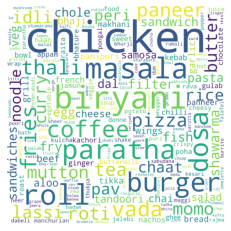

In [200]:
dishes=''
for word in data['dish_liked']:
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis("off")

In [201]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=df[df['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase 
            for i in range(len(words)): 
                words[i] = words[i].lower() 
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

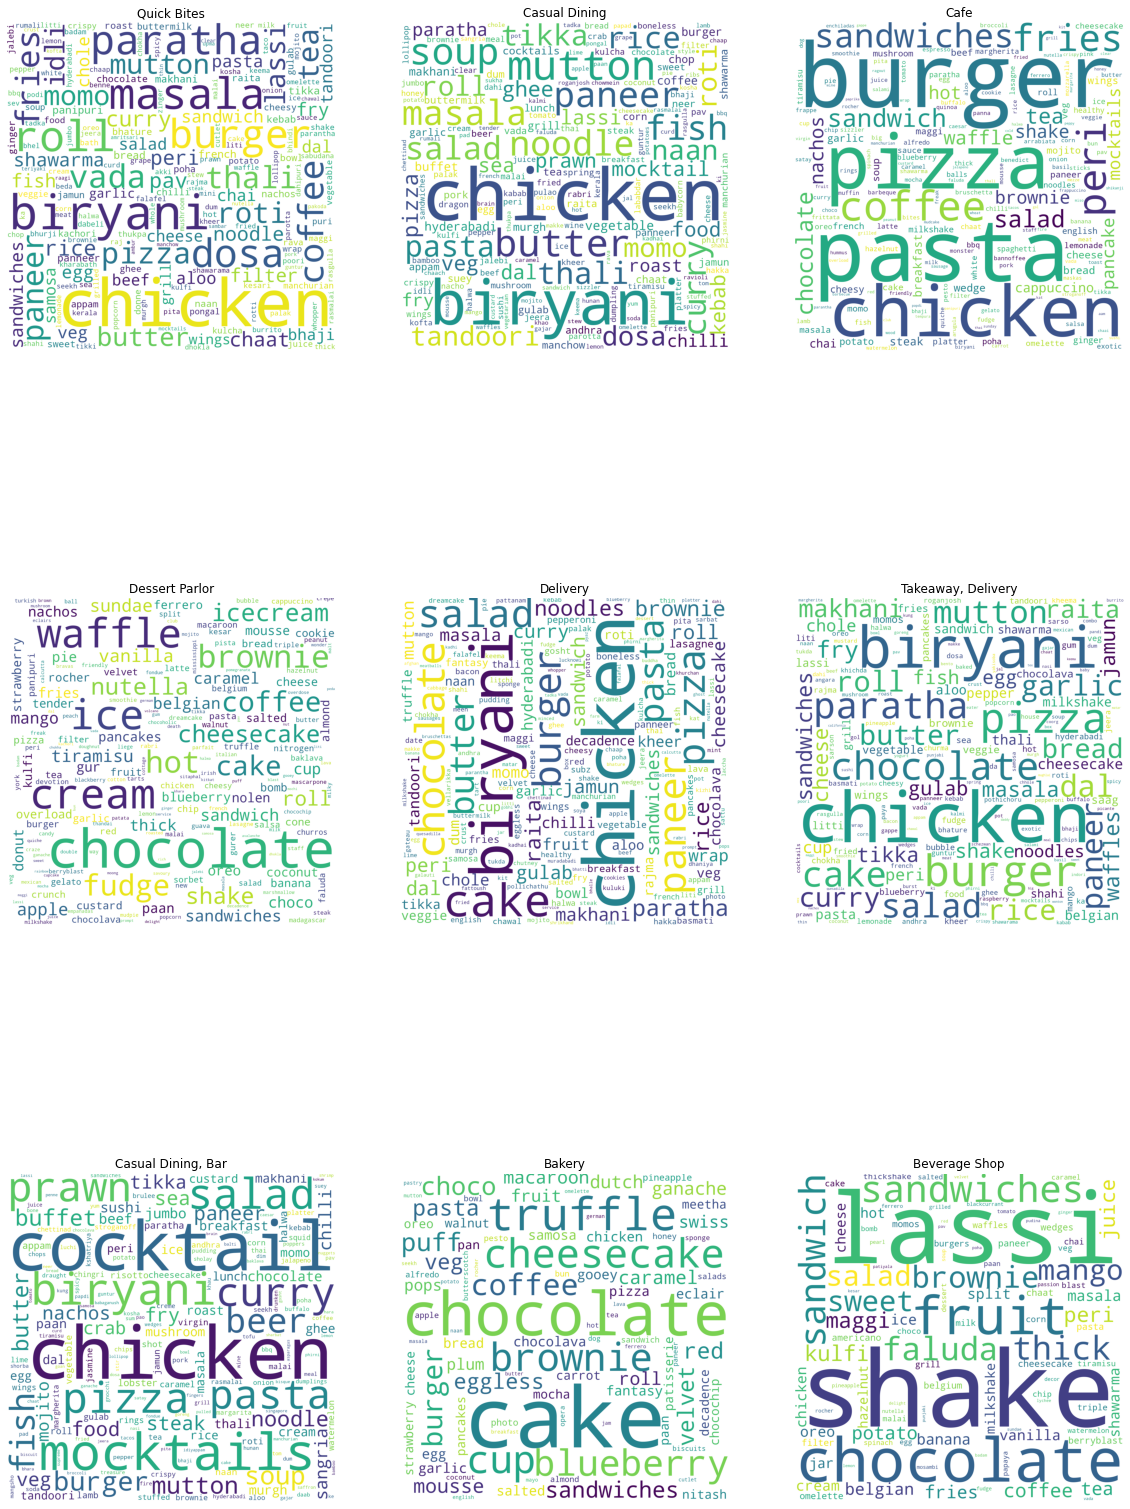

In [202]:
stopwords = set(STOPWORDS) 
produce_wordcloud(rest)

In [203]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [204]:
data=df['reviews_list'][0].lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [205]:
import re
data2=re.sub('[^a-zA-Z]', ' ',data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [206]:
data3=re.sub('rated', ' ',data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [207]:
data4=re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

remove multiple space

In [208]:
re.sub(' +',' ',data4)

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

#### analyse review of a particular restaurant

In [178]:
dataset=df[df['rest_type']=='Quick Bites']

In [179]:
type(dataset['reviews_list'][3])

str

In [181]:
import re

In [182]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)
 

(-0.5, 799.5, 799.5, -0.5)

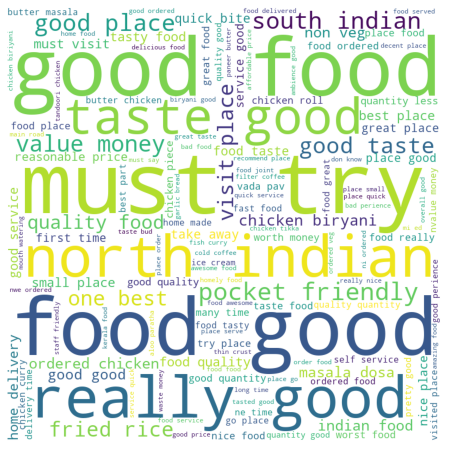

In [209]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

In [210]:
def importance(restaurant):
    dataset=df[df['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(total_review) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 